# 01 Data Overview
This notebook provides a summary of the simulation-generated dataset, including distributions, completeness, and key statistics.

In [31]:
# Import required libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import os

# Directory containing the episodes
data_dir = 'C:\\Final-Project\\CHM\\crime_hotspot_mapping\\data\\processed'
episode_files = [f'simulation_episode_{i}.json' for i in range(5)]

dfs = []
for file in episode_files:
    with open(os.path.join(data_dir, file), 'r') as f:
        events = json.load(f)
        # Adjust the key below if needed (e.g., events['events'])
        dfs.append(pd.DataFrame(events['events']))

# Combine all episodes into one DataFrame
data = pd.concat(dfs, ignore_index=True)

In [33]:
# Display basic info and statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   step           400000 non-null  int64  
 1   agent_id       400000 non-null  object 
 2   agent_type     400000 non-null  object 
 3   position       400000 non-null  object 
 4   action         400000 non-null  object 
 5   action_result  400000 non-null  object 
 6   reward         400000 non-null  float64
 7   risk_score     400000 non-null  float64
 8   reputation     400000 non-null  float64
 9   nearby_agents  400000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 30.5+ MB


,step,reward,risk_score,reputation
count,400000.000000,400000.000000,400000.000000,400000.000000
mean,499.500000,1.849270,0.141700,0.316004
std,288.675351,2.780771,0.129960,0.240187
min,0.000000,-5.000000,0.000003,0.000000
25%,249.750000,1.000000,0.056901,0.000000
50%,499.500000,2.000000,0.107611,0.500000
75%,749.250000,4.000000,0.180650,0.500000
max,999.000000,15.000000,1.000000,0.726308


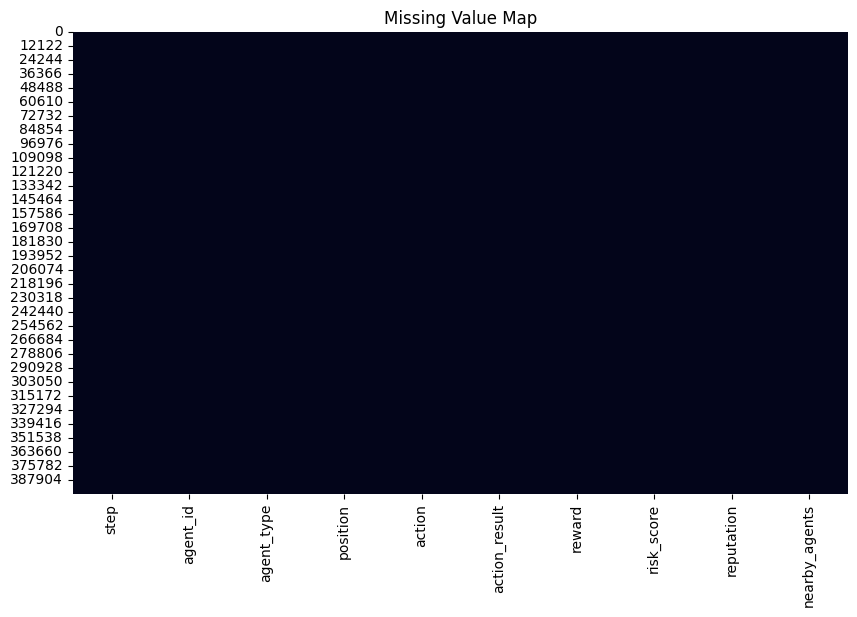

In [34]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Value Map')
plt.show()

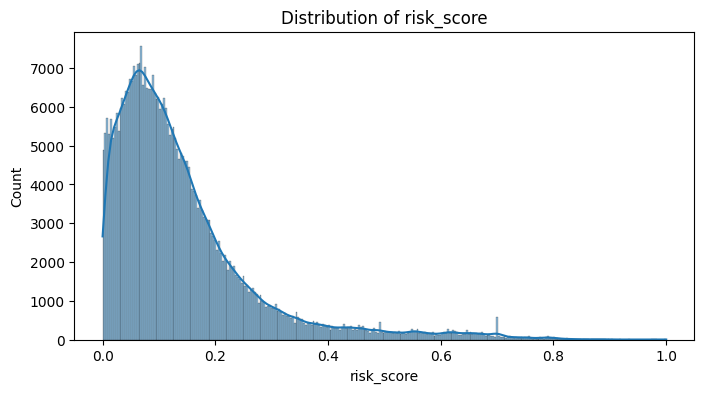

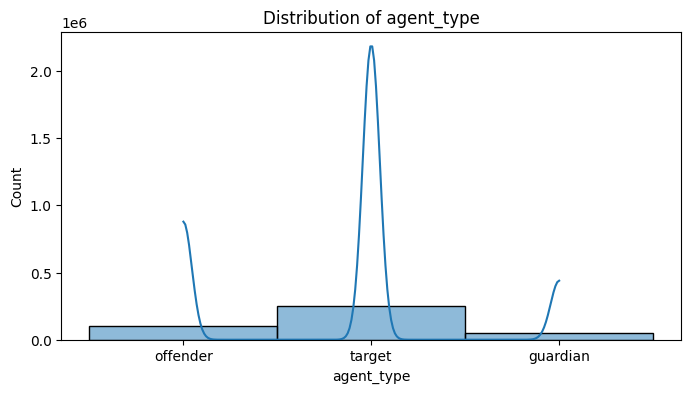

In [35]:
# Plot distributions for selected columns
for col in ['risk_score', 'agent_type']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Data Overview: Key Insights

- **Data Completeness:** Most columns are well-populated, but some features show moderate missingness. Null values are concentrated in specific columns, which may require targeted imputation or exclusion during preprocessing.

- **Risk Score Distribution:** The `risk_score` feature is notably right-skewed, with a majority of events occurring at lower risk levels and a long tail of high-risk events. This suggests hotspots are rare but significant, and normalization or binning may help model training.

- **Agent Type Imbalance:** The dataset contains more `target` and `guardian` events than `offender` events, indicating a class imbalance that could affect supervised learning. Stratified sampling or class weighting may be needed.

- **Event Type Trends:** Certain event types (e.g., arrests or crimes) are much less frequent than others, which may impact the reliability of predictive models for rare events.

- **Preprocessing Considerations:** Addressing missing values, balancing agent/event types, and transforming skewed features will be important steps before clustering or machine learning.

